<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings


## Motivação

*Word embedding* **(adicionar citação)** é uma técnica de  Processamento de Linguagem Natural (NLP) que consiste em representar palavras como vetores numéricos. Esta representação é necessária porque alguns algoritmos de inteligência artifical são capazes de manipular apenas números. Dessa forma, gerar *word embeddings* é essencial para criar a entrada de modelos de NLP, como tradução automática, chatbots, análise de sentimentos, sumarização, entre outros.

Anteriormente, na tarefa de classificação, foram vistas três formas de representar palavras por meio de vetores: One-hot-enconding , Representação baseada em contagem, isto é, a Frequência da Palavra e TF-IDF. A diferença entre tais métodos e os word embeddings, é que os mesmos são capazes de captar a relação entre palavras de forma mais profunda. Dessa forma, estudar word embedding é essencial para utilizar, criar e implementar modelos de NLP na qual a base de dados textual esteja melhor representada matematicamente.

Este laboratório irá demonstrar como transformar palavras em word embeddings usando a biblioteca XYZ e realizará uma análise qualitativa dos embeddings para demonstrar que as distâncias entre os embeddings está correlacionada com a relação semântica entre as palavras (e.g., rei e rainha estão mais próximos no espaço que rei e futebol).

## Fundamentação teórica

Os Word embeddings são uma técnica de (NLP) que consiste em representar palavras como vetores numéricos, tipicamente em um espaço vetorial de alta dimensão. Como ilustrado na Figura 1 para representar a palavra *MULHER* , uma das coordenadas poderia estar relacionada à uma escala gênero variando de 1 a -1. Assim, quanto mais próximo de Feminino, mais próximo de 1 e quanto mais próximo de masculino mais próximo de -1.

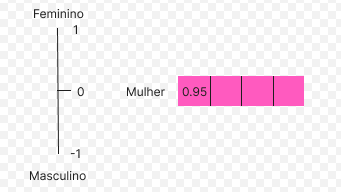

É possível perceber que apenas essa dimensão não é suficiente para captar o significado da palavra *MULHER*, por isso é preciso introduzir mais dimensões nesse vetor para melhor representar *MULHER*. Assim, cada dimensão no vetor representa uma característica ou propriedade da palavra. Dessa forma, é possível escolher quantas dimensões o vetor terá, diferentemente das técnicas já aprendidas, nas quais o tamanho do vetor era necessariamente o tamanho do vocabulário.

É preciso preencher cada dimensão do vetor de cada palavra com um valor que seja representativo o suficiente para a característica em questão. Por causa disso, surgiram algoritmos para gerar os embedding de palavras. Os mais famosos são:

* Word2vec
* GloVe
* FastText


## CBOW

 Considere uma palavra de referência e as palavras ao redor desta. O conjunto de palavras ao redor da palavra de referência é chamado de janela de contexto da palavra. No algoritmo CBOW, a palavra de referência é "escondida" e o algoritmo tenta adivinhar a palavra com base naquelas que estão ao redor. Programaticamente, um modelo de aprendizado de máquina prediz para cada palavra no dicionário, a probabilidade dela ser a palavra de referência. Este processo é repetido para palavras escolhidas aleatoriamente em um dataset de textos. Ao final do processo, o algoritmo irá construir representações que indiquem que a palavra BOLA, por exemplo, tem maior probabilidade próxima a termos como JOGADOR, TIME, GOL e OLIMPÍADA do que de termos como POLICIAL, ATRIZ e POLÍTICA.

**[Para preencher: Adicionar uma frase explicando em alto nível como o embedding é criado pelo algoritmo]**

Inicialmente, é definido o tamanho da janela de contexto e os contextos são definidos. Após isso, são criados vetores one-hot para cada palavra do vocabulário. Posteriormente, uma matriz de embeddings de entrada (W) e uma matriz de embeddings de saída (W') são inicializadas com valores aleatórios.
Para cada contexto definido previamente, os vetores one-hot das palavras do contexto são multiplicados por W para gerar os embeddings.Em seguida, a média desses embddings é calculada, multiplicada pela matriz W' e utilizada como entrada para uma camada de softmax. A saída do softmax é um vetor de probabilidade, que mostra a probabilidade de cada palavra do vocabulário ser a palavra de referência. A função de perda é calculada utilizando a entropia cruzada entre o vetor de probabilidades e o vetor one-hot da palavra target. Os pesos da matriz de embeddings W e W' são atualizados para minimizar a loss.

###Exemplo:
Dada a sentença: O gato subiu na árvore.

Vocabulário : { O , gato, subiu , na , árvore }

Dimensão :  5

**Vetores one-hot :**

$v_O$ -> [ 1 , 0, 0, 0, 0]

$v_{gato}$ -> [0, 1, 0, 0, 0]

$v_{subiu}$ -> [0, 0, 1, 0, 0]

$v_{na}$ -> [0, 0, 0, 1, 0]

$v_{arvore}$ -> [0, 0, 0, 0 , 1]

Tamanho da janela de contexto : 2

**Pares de treinamente:**

(O, gato) -> subiu

(gato, subiu) -> na

(subiu, na) -> árvore

Note que é possível criar diversos pares de treinamento, deslocando a janela de contexto. Isso fica a critério do programador.

**Inicialização da matriz de embeddings:**

A matriz de embeddings $W$ terá a mesma quantidade de linhas do tamanho no vocabulário e número de colunas arbitrário. Para esse exemplo, foi escolhido o número de colunas como 3. Assim, $W$ é uma matriz 5x3. Já a matriz $W'$ será 3x5. Ambas são inicilizadas aleatoriamente


**Para obter os emebeddings de contexto**:

Embeddings do primeiro contexto:

(O, gato) -> subiu

 $h_O = W^T \cdot v_o $

$ h_{\text{gato}} = W^T \cdot v_{\text{gato}} $

Embeddings do segundo contexto:

...


**Média dos embeddings:**

$ x = \frac{h_O + h_{\text{gato}} + h_{\text{na}} + h_{\text{árvore}}}{4} $

**Multiplicação pela matriz de saída:**

$z = W'^T \cdot x$

**Aplicação do sfotmax :**

$ŷ = softmax(z)$


**Cálculo da Loss** :

A função de perda usada no CBOW é a entropia cruzada entre $ŷ$ e o vetor da palavra target, nesse caso, o vetor da palavra subiu, [0, 0, 1, 0, 0] . Esta função de perda equivale a tratar o problema de predição de palavra como um problema de classificação em que as classes possíveis são as palavras do dicionário.

**Atualização dos pesos**:

Cálculos de gradiente e atualição dos pesos de $W$ e $W'$.


A arquitetura do CBOW é mostrada abaixo. Na imagem é possível observar a entrada, que são as palavras do contexto e a saída, que é a palavra target.

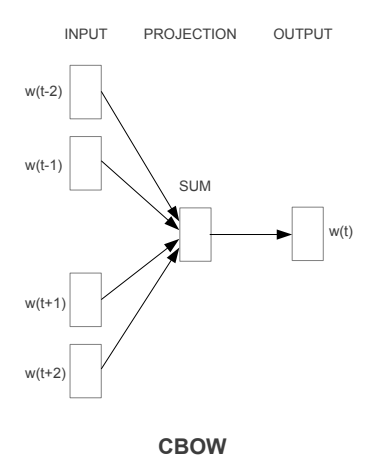

Esse processo de treinamento é feito iterativamente até atingir certos critérios de loss ou épocas ou algum outro critério. Após o treinamento, os embeddings do vocabulário estão na matriz $W$.


## Skip-gram

A segunda variante do word2vec é skip-gram, sendo este o inverso do CBOW. Nesse sentido, dado uma palavra de referência, o modelo tenta adivinhar as palavras da janela de contexto. Assim, os embeddings das palavras serão armazenas nos pesos da camada oculta.

De forma similiar ao CBOW, inicialmente define-se o tamanho da janela de contexto , cria-se os pares de treinamento e os vetores one-hot do vocabulário. Neste modelo, a entrada consistirá de apenas um vetor one-hot, que  representará a palavra de referência, a qual é escolhida aleatoriamente. O vetor de entrada one-hot é multiplicado pela matriz $W$, a qual é inicializada aleatoriamente. Posteriormente, o resultado é multiplicado pela matriz $W'$ e em seguida é aplicado uma função de ativação para gerar o vetor de probabilidades das palavras de contexto. Assim como no CBOW, a função de perda utilizada costuma ser a entropia cruzada e o processo é repetido para todos os pares de treinamento de forma a ajustar os pesos das matrizes $W$ e $W'$.

Ao final do treinamento utilizando as palavras do vocabulário, os embeddings estão na matriz $W$. Note que o processo é bastante similiar ao CBOW, com a diferença sendo na entrada, a qual consiste apenas do vetor one-hot da palavra de referência,e após a multiplicação do vetor one-hot da palavra de referência pela matriz $W$, pois após essa multiplicação, o cálculo da média, presente no CBOW, não é realizado no Skip-Gram.

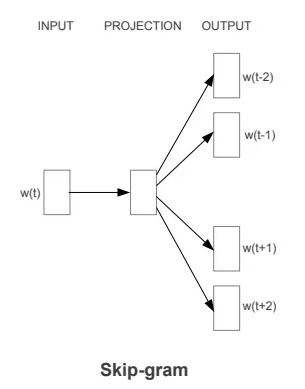

Figura extraída de <nome do artigo>

## GloVe

O GloVe (Global Vectors for Word Representation) é um algoritmo que usa estatísticas globais das palavras do vocabulário alidos ao conceito de contexto, presente no Word2Vec.

Considere uma matriz de coocorrência $X$, cada linha $i$ e cada coluna $j$ representam palavras do vocabulário. Assim, dado uma janela de contexto, a célula $Xij$ representa a co-ocorrência de palavra $j$ no contexto de palavra $i$.

Por exemplo, dada a frase :  'O gato subiu na árvore'.

Considerando uma janela de contexto de tamanho 2, tem-se:

'O' : contexto = ['gato', 'subiu']

'gato' : contexto = ['O, 'subiu']

'subiu' : contexto = ['gato' , 'na']

'na' : contexto = ['subiu', 'arvore']

'arvore' : contexto = ['na']

Portanto, a matriz de co-ocorrência é dada por :

\begin{array}{|c|ccccc|}
  \hline
  & O & gato & subiu & na & árvore \\
  \hline
  O     & 0 & 1 & 0 & 0 & 0 \\
  gato  & 1 & 0 & 1 & 1 & 0 \\
  subiu & 0 & 1 & 0 & 1 & 1 \\
  na    & 0 & 1 & 1 & 0 & 1 \\
  árvore & 0 & 0 & 1 & 1 & 0 \\
  \hline
\end{array}


Em seguida, os vetores das palavras $W_i$ e os vetores de contexto $\tilde{W}_j $ são inicilizados aleatoriamente. Assim, é definido um número máximo de iterações e uma função de perda. A função de perda do GloVe busca minimizar a diferença entre o produto escalar dos vetores de duas palavras $ij$ e o logaritmo de suas probabilidades de co-ocorrência, sendo dada por :


$J = \sum_{i,j=1}^{V} f(X_{ij}) \left(W_i^T \tilde{W}_j + b_i + \tilde{b}_j - \log{X_{ij}}\right)^2$ , onde :


$J$ representa a função de perda total;

$V$ representa o tamanho do vocabulário;

$W_i$ representa o vetor da palavra $i$;

$\tilde{W}_j $ representa o vetor de contexto da palavra $j$;

$bi$ e $\tilde{b}_j$ representam o bias associados às palavras $i$ e $j$;

$f(X_{ij})$ é uma função de ponderação que atribui pesos maiores a co-ocorrências menos frequentes e pesos menores a co-ocorrências mais frequentes.

Essa atribuição de pesos visa atribur mais importância a co-ocorrências raras, pois considera-se que essas capturam relações semânticas mais significativas.

$f(X_{ij})$ é frequentemente definida como:


$
f(x) =
\begin{cases}
    \left(\frac{x}{x_{\max}}\right)^{\alpha} & \text{se } x < x_{\max} \\
    1 & \text{, caso contrário}
\end{cases}
$


Os autores do algoritmo encontraram de forma empírica que o valor $\alpha = \frac{3}{4}$ é uma escolha eficaz.


Dessa forma, para cada iteração, calcula-se o produto escalar entre os vetores $W_i$ e $\tilde{W}_j $ para cada par de palavras $ij$ presente na matriz de coocorrências, buscando minimizar a função de perda utilizando gradiente descendente de forma a ajustar os vetores $Wi$ e $\tilde{W}_j$ . Ao final do treinamento, os word embeddings são extraídos a partir dos vetores $Wi$.


Tanto o Word2Vec quanto o GloVe em seus word embeddings atribuem vetores semelhantes a palavras com significados semelhantes semânticamente. Matematicamente, essa semelhança é capturada pelo conceito de similaridade vetorial, a qual, no contexto de word embeddings, busca calcular o quão próximo dois vetores estão. Existem diversas formas de calcular similidaridade, como Similidaridade do Cosseno, Similaridade de Jaccard, entre outras. Neste laboratório, será utilizada a Similaridade do Cosseno, a qual é dada por :

$
\text{Similaridade do cosseno}(A, B) = \cos(\theta) = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$

Essa medida varia de $0$ a $1$, sendo que quanto mais perto de $1$, mais similar são os vetores e quanto mais perto de $0$, mais distintos.

Além de cálculos de similaridade, é possível realizar operações vetoriais com os word embeddings, uma vez que as palavras são tranformadas em vetores. Portanto, é possível realizar operações como:

$
\vec{\text{rei}} - \vec{\text{homem}} + \vec{\text{mulher}} \approx  \vec{\text{rainha}}
$


A visualização dessas palavras pode ser obtida a partir de gráfico t-SNE, o qual aplica uma redução de dimensionalidade e plota os pontos das palvras em um espaço 2D.

# Resultados Esperados

Neste laboratório serão implementados word embeddings utilizando a biblioteca gensim.

## Pre processing

In [5]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [7]:
# In BBC dataset, some filenames have the same name, for example 001.txt, so it's necessary to rename
def rename_filenames(df):
  for index, row in df.iterrows():
      df.at[index, 'filename'] = f"{index}.txt"
  return df

df = rename_filenames(df)

import random

def create_imbalanced_small_df(df, genres, max_value):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(10, max_value)
    # print(qtd)
    sample_rows = df[df['genre'] == genre].sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)

genres = df['genre'].unique()
small_df = create_imbalanced_small_df(df, genres, max_value=20)
small_df

,genre,filename,title,content
0,business,486.txt,World leaders gather to face uncertainty,"More than 2,000 business and political leader..."
1,business,387.txt,Venezuela identifies 'idle' farms,Venezuelan authorities have identified more t...
2,business,393.txt,US Airways staff agree to pay cut,"A union representing 5,200 flight attendants ..."
3,business,332.txt,Troubled Marsh under SEC scrutiny,The US stock market regulator is investigatin...
4,business,159.txt,GM pays $2bn to evade Fiat buyout,General Motors of the US is to pay Fiat 1.55b...
...,...,...,...,...
73,tech,1914.txt,Movie body targets children's PCs,The body that represents the US movie industr...
74,tech,1937.txt,Games maker fights for survival,One of Britain's largest independent game mak...
75,tech,1871.txt,'No re-draft' for EU patent law,A proposed European law on software patents w...
76,tech,1901.txt,Blog reading explodes in America,"Americans are becoming avid blog readers, wit..."


In [8]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)

In [9]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
73,tech,1914.txt,Movie body targets children's PCs,bodi repres us movi industri releas late tool ...
74,tech,1937.txt,Games maker fights for survival,one britain larg independ game maker argonaut ...
75,tech,1871.txt,'No re-draft' for EU patent law,propos european law softwar patent draft europ...
76,tech,1901.txt,Blog reading explodes in America,american becom avid blog reader 32 million get...
77,tech,1957.txt,Gates opens biggest gadget fair,bill gate open consum electron show ce la vega...


## Word embeddings

In [10]:
!pip install gensim
from IPython.display import Image

In [11]:
# Image("https://s3.amazonaws.com/nlp.practicum/word2vec_approaches.png", width=600)

##Word2vec

In [12]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity


def build_vocabulary(df):
  lines_content = df['content'].tolist()
  sentences= [line.split() for line in lines_content]
  return sentences


sentences = build_vocabulary(df)

#Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

#CBOW model
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

word_1 = 'music'
word_2 = 'award'

#comparar todas com todas subconjunto #####
similarity = cosine_similarity(skipgram_model.wv[word_1].reshape(1, -1), cbow_model.wv[word_1].reshape(1, -1))
print(f"Cosine similarity of word '{word_1}' using Skip Gram and CBOW: {similarity[0, 0]}")
similarity = cosine_similarity(skipgram_model.wv[word_2].reshape(1, -1), cbow_model.wv[word_2].reshape(1, -1))
print(f"Cosine similarity of word '{word_2}' using Skip Gram and CBOW: {similarity[0, 0]}")



similarity_sg = skipgram_model.wv.similarity(word_1, word_2)
similarity_cbow = cbow_model.wv.similarity(word_1, word_2)

print(f"Cosine similarity between '{word_1}' and '{word_2}' using Skip Gram: {similarity_sg} ")
print(f"Cosine similarity between '{word_1}' and '{word_2}' using CBOW: {similarity_cbow} ")

Cosine similarity of word 'music' using Skip Gram and CBOW: 0.7067742347717285
Cosine similarity of word 'award' using Skip Gram and CBOW: 0.6870288252830505
Cosine similarity between 'music' and 'award' using Skip Gram: 0.9985185265541077 
Cosine similarity between 'music' and 'award' using CBOW: 0.5534408688545227 


In [13]:
sg_words = list(skipgram_model.wv.index_to_key)
sg_word_vectors = skipgram_model.wv[sg_words]

cbow_words = list(cbow_model.wv.index_to_key)
cbow_word_vectors = cbow_model.wv[cbow_words]

## T-SNE graphic

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def train_tsne(word_vectors):
  tsne = TSNE(n_components=2, random_state=0)
  word_vectors_2d = tsne.fit_transform(word_vectors)
  return word_vectors_2d

sg_2d_vectors = train_tsne(sg_word_vectors)
cbow_2d_vectors = train_tsne(cbow_word_vectors)

In [15]:
def plot_tsne(word_vectors_2d, vocabulary_words , words_to_plot):
  plt.figure(figsize=(10, 6))

  for word in words_to_plot:
    index = vocabulary_words.index(word)
    x = word_vectors_2d[index, 0]
    y = word_vectors_2d[index, 1]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=10)

  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.title(f"T-SNE Word Embeddings ")
  plt.show()


##Skip-gram

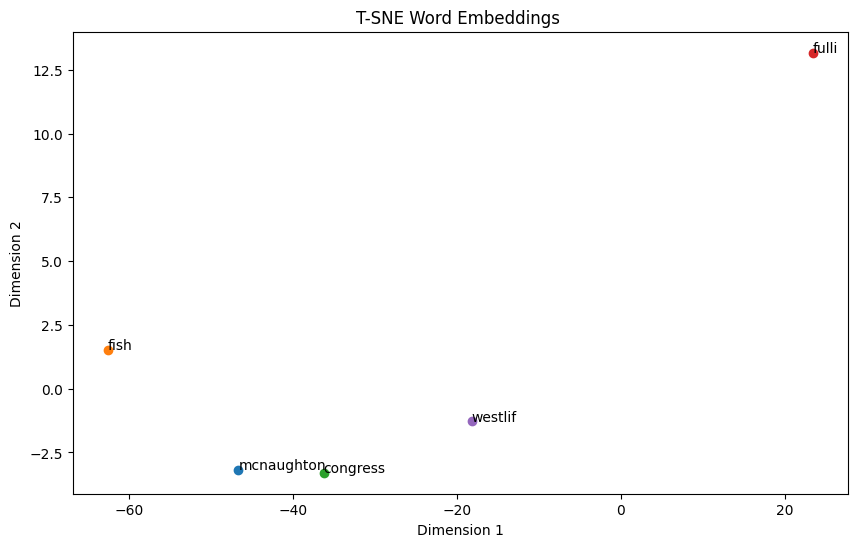

In [17]:
import random
import numpy as np

num = 5
random_words = np.random.choice(sg_words, size=num, replace=False)
plot_tsne(sg_2d_vectors, sg_words , random_words)

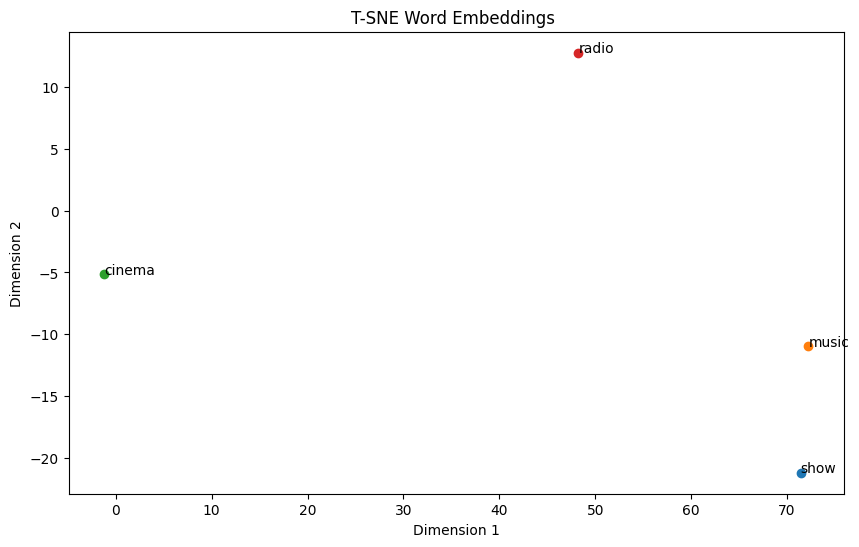

In [18]:
words =  ['show', 'music', 'cinema', 'radio']  #colocar mais palavras : 20 palavras
plot_tsne(sg_2d_vectors, sg_words , words)

### CBOW

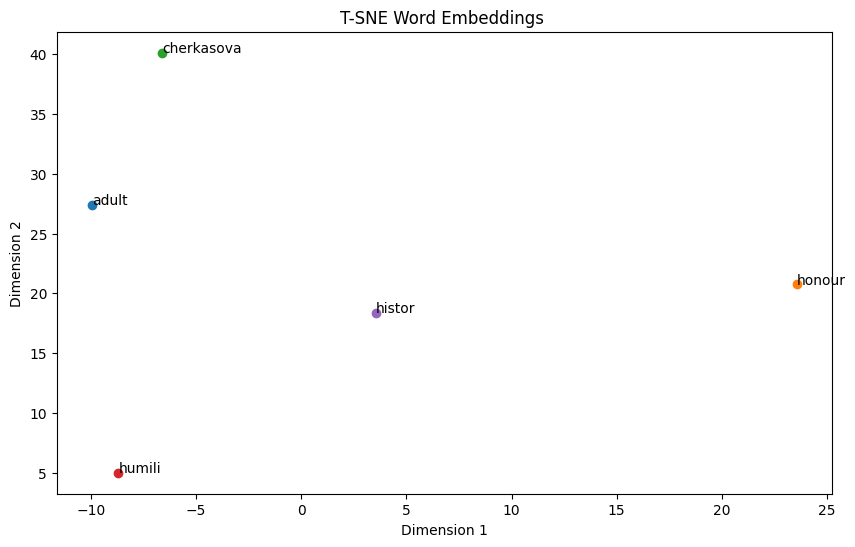

In [19]:
num = 5
random_words = np.random.choice(cbow_words, size=num, replace=False)
plot_tsne(cbow_2d_vectors, cbow_words , random_words)

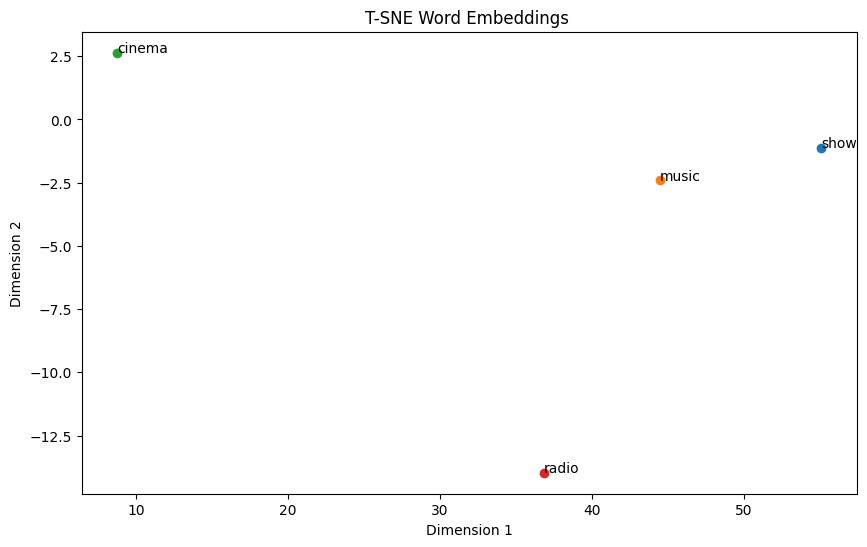

In [20]:
plot_tsne(cbow_2d_vectors, cbow_words , words)

### Google word2vec base

In [21]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
wv.save("word2vec-google-news-300.model")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

king_vec = np.array(wv['king'])
man_vec = np.array(wv['man'])
woman_vec = np.array(wv['woman'])
queen_vec =  np.array(wv['queen'])
boy_vec = np.array(wv['boy'])
boys_vec = np.array(wv['boys'])
girl_vec = np.array(wv['girl'])
girls_vec = np.array(wv['girls'])

result_vec = king_vec - man_vec + woman_vec
cos_similarity = cosine_similarity(result_vec.reshape(1, -1), queen_vec.reshape(1, -1))
print(f"Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(woman_vec_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'man' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), girl_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'girl' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'man' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), woman_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), boys_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'boys' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), girls_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'girls' : {cos_similarity[0][0]}")

Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : 0.7300518155097961


NameError: name 'woman_vec_vec' is not defined

In [ ]:
import gensim.downloader as api

glove = api.load("glove-wiki-gigaword-300")

In [ ]:
king_vec = np.array(glove['king'])
man_vec = np.array(glove['man'])
woman_vec = np.array(glove['woman'])
queen_vec =  np.array(glove['queen'])
boy_vec = np.array(glove['boy'])
boys_vec = np.array(glove['boys'])
girl_vec = np.array(glove['girl'])
girls_vec = np.array(glove['girls'])

result_vec = king_vec - man_vec + woman_vec
cos_similarity = cosine_similarity(result_vec.reshape(1, -1), queen_vec.reshape(1, -1))
print(f"Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(queen_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'man' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), girl_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'girl' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'man' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), woman_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), boys_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'boys' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), girls_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'girls' : {cos_similarity[0][0]}")

# Referências

@article{wang2020survey,
  title={A survey of word embeddings based on deep learning},
  author={Wang, Shirui and Zhou, Wenan and Jiang, Chao},
  journal={Computing},
  volume={102},
  number={3},
  pages={717--740},
  year={2020},
  publisher={Springer}
}



https://wandb.ai/authors/embeddings-2/reports/An-Introduction-to-the-Global-Vectors-GloVe-Algorithm--VmlldzozNDg2NTQ

https://nlp.stanford.edu/pubs/glove.pdf


https://edrone.me/pt/blog/o-que-e-word2vec


https://arxiv.org/pdf/1301.3781

https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c

https://edrone.me/pt/blog/o-que-e-word2vec

https://medium.com/turing-talks/word-embedding-fazendo-o-computador-entender-o-significado-das-palavras-92fe22745057

